In [7]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
#How do the algorithms CART or Random Forest work?

In [9]:
data = np.loadtxt('Irisdata.txt')
data.shape
print data[145:150]

[[ 6.7  3.   5.2  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 6.5  3.   5.2  2. ]
 [ 6.2  3.4  5.4  2.3]
 [ 5.9  3.   5.1  1.8]]


In [10]:
# input:  	1) datamatrix as loaded by numpy.loadtxt('Irisdata.txt').
#			2) vector (numpy array) of indices for k seed observation.
# output: 	1) numpy array of the resulting cluster centers. 
#			2) vector (numpy array) consisting of the assigned cluster for each observation.
# note the indices are an index to an observation in the datamatrix
data = np.loadtxt('Irisdata.txt')
n, _ = data.shape
k = 3
seedIndices = (np.random.permutation(n))[:k]

#uses seedIndices
def kmeans(data, seedIndices, **kwargs): 
    
    k = len(seedIndices)
   
    #compute Euclidean distances from each cluster centre to each data point
    def distance(data1,data2):
        data1_n, dim = data1.shape
        data2_n, dim = data2.shape
        dist = np.zeros((data1_n, data2_n))
        for i in range(data1_n): 
            for j in range(data2_n): 
                dist[i,j] = np.linalg.norm(data1[i,:] - data2[j,:])
        return dist
    
    def assign_cluster(data, centres):
        dist = distance(data,centres) #calculate distances between cluster centres and data points
        closest = np.argmin(dist, axis = 1) #axis = 1 for closest index of each row
        return closest
    
    def cluster_centres(data, closest_cluster, k):
        new_centres = np.zeros(data[:k,].shape)
        for i in range(k):
            clusters = data[closest_cluster==i,:] #assign each data point to its cluster
            new_centres[i] = np.mean(clusters, axis = 0) #axis = 0 to take the mean of the columns of each cluster
        return np.array(new_centres)
    
    #select initial value of cluster centres
    #k=5
    centres =[]
    for i in range (0,k):
        centres.append(data[seedIndices[i],:])
    centres = np.array(centres)

    #initialise number of iterations and set inital condition
    t = 0
    convergence = 0
    t_max = 2
    
    closest_cluster = assign_cluster(data, centres)
    new_centres = cluster_centres(data, closest_cluster, k)
    
    while convergence == 0:
        t = t + 1
        
        centres = new_centres
        closest_cluster = assign_cluster(data, centres)
        new_centres = cluster_centres(data, closest_cluster, k)
        
        if (new_centres - centres).any() == 0:
            convergence = 1
        elif t > t_max:
            convergence = 1
            #np.array(new_centres[closest_cluster])
    return np.array(new_centres), np.array(closest_cluster)

    pass


In [11]:
# input: Datamatrix as loaded by numpy.loadtxt('Irisdata.txt')
# output: Datamatrix of the projected data onto the two first principal components.
#from sklearn.preprocessing import StandardScaler
def apply_pca(data):
    #X_std = StandardScaler().fit_transform(data)
    
    #centre the data
    mean_cols = np.mean(data, axis=0)
    var_cols = np.sqrt(np.var(data, axis = 0))
    r, _ = data.shape
    mean_matrix = np.array([mean_cols]*r)
    var_matrix = np.array([var_cols]*r)
    cent_data = (data - mean_matrix)/var_matrix
    #if (X_std - cent_data).any() == 0:
        #print 'The same'
    #cent_data = X_std
    
    #calculate covariance matrix for d dimensions of data
    matrix = np.cov(cent_data.T)
    #eigendecomposition of covariance matrix
    evals, evecs = np.linalg.eig(matrix)
    evals_r = np.abs(np.real(evals))
    evecs_r = np.real(evecs) #eigenvectors should all have unit length 1
    #sort in descending order
    idx = np.argsort(evals_r)[::-1]
    evals_desc = evals_r[idx]
    evecs_desc = evecs_r[:,idx] #this doesn't seem to be taking each column as eigenvectors
    
    #so have to select it by column below
    #projection matrix to reduce d dimensional space to 2D subspace by choosing the first 2 PCs
    W = np.hstack((evecs_desc[:,0].reshape(4,1), evecs_desc[:,1].reshape(4,1))) #stack arrays as columns
    
    #pairing them first seems to sort eigenvectors by column
    pair = [(evals_r[i], evecs_r[:,i]) for i in range(len(evals_r))]
    pair.sort(reverse = True)
   
    matrix_w = np.hstack((pair[0][1].reshape(4,1), pair[1][1].reshape(4,1)))
    #project data onto subspace spanned by the first 2 PCs
    new_data = np.dot(cent_data, W)
    if (W-matrix_w).any() == 0:
        print 'Yes'
    return new_data, W, cent_data
    pass

#apply_pca(data)


Yes
Yes


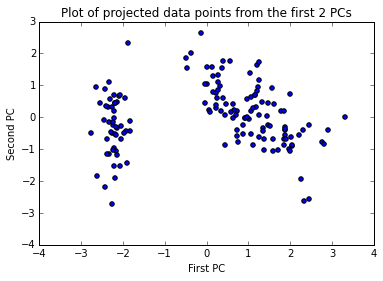

In [12]:
#c) Visualize the projected data points from b) in a 2-D scatter plot. How many clusters do you see?
projected_data, W, cent_data = apply_pca(data)
threeIndices = (np.random.permutation(n))[:3]
groups, groupLabels = kmeans(data, threeIndices)
_, _, cent_group = apply_pca(groups)

plt.scatter(projected_data[:,0], projected_data[:,1])
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Plot of projected data points from the first 2 PCs')

[139  75   2]
Yes


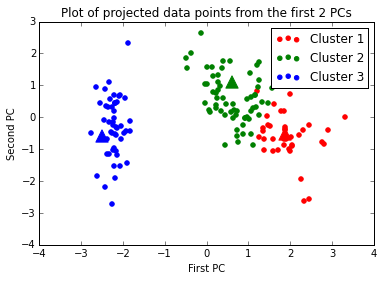

In [13]:
#d) Repeat the plot, giving different colors to the clusters found in a).
#Include the corre- sponding final cluster centers,
#visualized with a different marker but the same color as the cluster. What do you see?
k = 3

threeIndices = (np.random.permutation(n))[:3]
print threeIndices

groups, groupLabels = kmeans(data, threeIndices)
_, _, cent_group = apply_pca(groups)
projected_groupcentres = np.dot(cent_group, W)

group1_indices = [i for i, a in enumerate(list(groupLabels)) if a == 0]
group2_indices = [i for i, a in enumerate(list(groupLabels)) if a == 1]
group3_indices = [i for i, a in enumerate(list(groupLabels)) if a == 2]

plt.scatter(projected_data[:,0][group1_indices], projected_data[:,1][group1_indices], color='r', label = "Cluster 1")
plt.scatter(projected_data[:,0][group2_indices], projected_data[:,1][group2_indices], color='g', label = "Cluster 2")
plt.scatter(projected_data[:,0][group3_indices], projected_data[:,1][group3_indices], color='b', label = "Cluster 3")
plt.scatter(projected_groupcentres[:,0][0],projected_groupcentres[:,1][0], marker ='^', color='r', s=150)
plt.scatter(projected_groupcentres[:,0][1],projected_groupcentres[:,1][1], marker ='^', color='g', s=150)
plt.scatter(projected_groupcentres[:,0][2],projected_groupcentres[:,1][2], marker ='^', color='b', s=150)
plt.legend()
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Plot of projected data points from the first 2 PCs')


#[141  95 138] red & blue switched

[84, 67, 28]
Yes


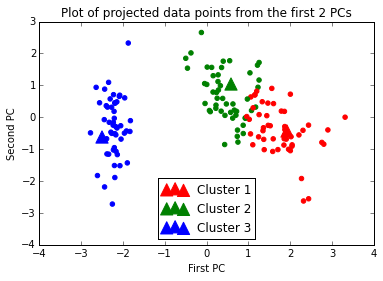

In [14]:
import pylab
pylab.close()

threeIndices = [84, 67, 28]
print threeIndices

groups, groupLabels = kmeans(data, threeIndices)
_, _, cent_group = apply_pca(groups)
projected_groupcentres = np.dot(cent_group, W)

colors = ([('r','g','b')[i] for i in groupLabels])
labels = ([('Cluster 1','Cluster 2','Cluster 3')[i] for i in groupLabels])
plt.scatter(projected_data[:,0],projected_data[:,1], color=colors)

plt.scatter(projected_groupcentres[:,0][0],projected_groupcentres[:,1][0], color='r', marker = '^', s=150, label = "Cluster 1")
plt.scatter(projected_groupcentres[:,0][1],projected_groupcentres[:,1][1], color='g', marker = '^', s=150, label = "Cluster 2")
plt.scatter(projected_groupcentres[:,0][2],projected_groupcentres[:,1][2], color='b', marker = '^', s=150, label = "Cluster 3")

plt.legend(loc='lower center')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Plot of projected data points from the first 2 PCs')

#[84 67 28]
#[ 58  44 110]


[114  62  33]
Yes
Yes
Yes
Yes


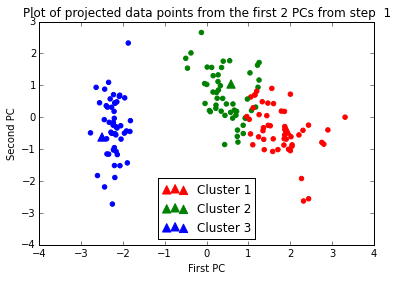

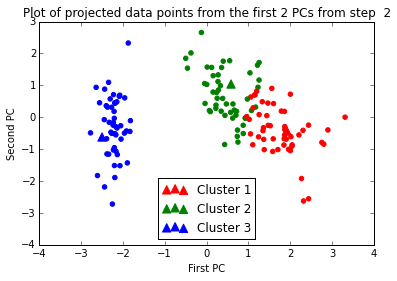

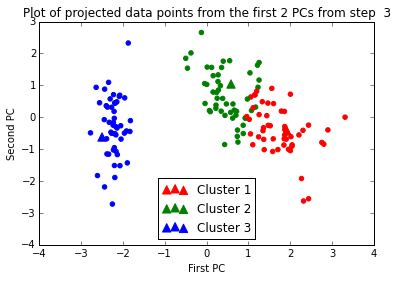

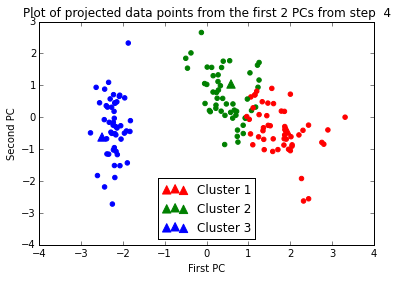

In [18]:
#Exercise 3.
#For the first four steps of your k-means algorithm, 
#plot your dataset with color- coded cluster memberships
#and cluster centers just like in Exercise 2 c). What do you see?
np.random.seed(0)
def kmeans_plot(data, seedIndices):
    k = len(seedIndices)
    #compute Euclidean distances from each cluster centre to each data point
    def distance(data1,data2):
        data1_n, dim = data1.shape
        data2_n, dim = data2.shape
        dist = np.zeros((data1_n, data2_n))
        for i in range(data1_n): 
            for j in range(data2_n): 
                dist[i,j] = np.linalg.norm(data1[i,:] - data2[j,:])
                
        return dist
    
    def assign_cluster(data, centres):
        dist = distance(data,centres) #calculate distances between cluster centres and data points
        closest = np.argmin(dist, axis = 1) #axis = 1 for closest index of each row
        return closest
    
    def cluster_centres(data, closest_cluster, k):
        new_centres = np.zeros(data[:k,].shape)
        for i in range(k):
            clusters = data[closest_cluster==i,:] #assign each data point to its cluster
            new_centres[i] = np.mean(clusters, axis = 0) #axis = 0 to take the mean of the columns of each cluster
        return np.array(new_centres)
    
    ###function to plot clusters for first t_max steps
    def plot_cluster(data, new_centres, closest_cluster):

        groups, groupLabels = kmeans(data, threeIndices)
        _, _, cent_group = apply_pca(groups)
        projected_groupcentres = np.dot(cent_group, W)
        
        colors = ([('r','g','b')[i] for i in groupLabels])
        labels = ([('Cluster 1','Cluster 2','Cluster 3')[i] for i in groupLabels])
        plt.scatter(projected_data[:,0],projected_data[:,1], color=colors)

        plt.scatter(projected_groupcentres[:,0][0],projected_groupcentres[:,1][0], color='r', marker = '^', s=70, label = "Cluster 1")
        plt.scatter(projected_groupcentres[:,0][1],projected_groupcentres[:,1][1], color='g', marker = '^', s=70, label = "Cluster 2")
        plt.scatter(projected_groupcentres[:,0][2],projected_groupcentres[:,1][2], color='b', marker = '^', s=70, label = "Cluster 3")
        
        plt.legend(loc='lower center')
        plt.xlabel('First PC')
        plt.ylabel('Second PC')
        plt.title('Plot of projected data points from the first 2 PCs from step{0:3}'.format(t+1))
        plt.figure()

        
    #select initial value of cluster centres
    centres =[]
    for i in range (0,k):
        centres.append(data[seedIndices[i],:])
    centres = np.array(centres)
    
    #initialise number of iterations and set inital condition
    t = 0
    convergence = 0
    t_max = 2
    
    closest_cluster = assign_cluster(data, centres)
    new_centres = cluster_centres(data, closest_cluster, k)
    #%matplotlib qt
    plot_cluster(data, new_centres, closest_cluster) #first plot
    
    while convergence == 0:
        t = t + 1
        centres = new_centres
        closest_cluster = assign_cluster(data, centres)
        new_centres = cluster_centres(data, closest_cluster, k)
        
        plot_cluster(data, new_centres, closest_cluster)
        if t > t_max:
            convergence = 1
            
            #np.array(new_centres[closest_cluster])
    return None

    pass

threeIndices = (np.random.permutation(n))[:3]
print threeIndices
kmeans_plot(data, threeIndices)


#[ 62 141  88] [61 62 87] blue & green switched
# [39 52 24] red & green switched
#[69 88 13] all correct

In [24]:
# input:  	1) datamatrix as loaded by numpy.loadtxt()
#			2) numpy array of the cluster centers.
#			3) vector (numpy array) consisting of the assigned cluster for each observation.
# output:	the k-means objective function value ass specified in the assignment for the given k
# note k is infered based on number of elements in centers
def objective_function_kmeans(data,centers,clusterLabels):
    clusters = centers[clusterLabels] #mu
    
    k, _ = centers.shape #get k
    
    E = np.sum( (np.linalg.norm(x_i - mu_j))**2 for x_i, mu_j in zip(data, clusters)) #for each data point
    return E
    pass

# input:  	1) vector (numpy array) of objective function values for k=1..10 for a random dataset
#			2) vector (numpy array) of objective function values for k=1..10 for a given dataset
# output:	vector (numpy array) of the computed gap statistics for each k=1..10
# note should calculate step 4 in 4.a in assignment description
def gap_statistics(Erand,E):
    G = np.log(Erand) - np.log(E)
    return np.array(G)
    pass

# input: 1) Datamatrix as loaded by numpy.loadtxt()
#        2) Random datamatrix of same size as input 1
#        3) numpy array of length 10 with initial center indices
# output: vector (numpy array) conisting of the gap statistics for k=1..10
# note this function should be called 10 times and averaged for the report.


def eval_clustering(data,randomData,initialCenters):
    k_total = len(initialCenters)

    E = []
    for i in range(1,k_total+1):
        centers, clusterLabels = kmeans(data, initialCenters[:i])
        E.append(objective_function_kmeans (data, centers, clusterLabels))
    E = np.array(E)
    
    Erand = []
    for i in range(1,k_total+1):
        centers_rand, clusterLabels_rand = kmeans(randomData, initialCenters[:i])
        Erand.append(objective_function_kmeans (randomData, centers_rand, clusterLabels_rand))
    Erand = np.array(Erand)
    
    G = np.array(gap_statistics(Erand,E))
    
    return G
    pass


[ 4.88308806  1.46563637  0.28704092  2.18293807]
[ 3.26922448  3.36670394  0.97595226  3.30992951]
[ 0.29444925  1.11657699  2.47011391  2.86443748]
[ 3.4378516   0.78480779  2.85393855  3.39643543]
[ 3.76334633  2.73911597  4.00397791  0.89883621]
[ 3.75995454  1.6458545   0.67430792  2.74116969]
[ 1.32689895  3.91019138  1.37557873  3.26261429]
[ 3.86592733  2.73787423  1.66255544  3.873258  ]
[ 4.22674716  4.89680369  1.04823832  4.46942464]
[ 3.67801154  2.1941528   1.81282041  2.72513692]
(10, 10)
[ 0.44972061  1.70804853  2.1854557   2.32238572  2.3254024   2.24897532
  2.31325126  2.32343062  2.25923698  2.24456995]
4


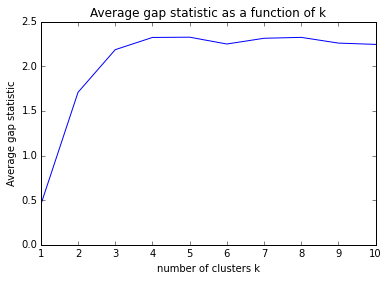

In [35]:
Iris_data = np.loadtxt('Irisdata.txt')
def benchmark_data(data):
    "Samples uniformly N values for each column (dimensions) in data."
    r, d = data.shape
    d_max = np.amax(data, axis = 1)
    d_min = np.amin(data, axis = 1)
    randomData = [] #need 10 different random data set
    for i in range(0,d):
        randomData.append(np.random.uniform(d_min[i],d_max[i],(r)))
    return np.transpose(np.array(randomData))

#[114  62  33 107   7 100  40  86  76  71]
 
randomData_list = []
for i in range (0,10):
    randomData_list.append(benchmark_data(Iris_data))

G_total = []
initialCenters = (np.random.permutation(r))[:10]
for a, randomData in list(enumerate(randomData_list)):
    print randomData[0,:]
    G_total.append(eval_clustering(Iris_data,randomData,initialCenters))
G_total = np.array(G_total)
print G_total.shape
avg_G = np.mean(G_total, axis = 0)
print avg_G
print np.argmax(avg_G)
k = xrange(1,11)
plt.plot(k, avg_G)
plt.xlabel('number of clusters k')
plt.ylabel('Average gap statistic')
plt.title('Average gap statistic as a function of k')


In [43]:
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
dst = scipy.spatial.distance.euclidean

def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    """
    Compute the Gap statistic for an nxm dataset in data.
    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,
    or state the number k of reference distributions in nrefs for automatic generation with a
    uniformed distribution within the bounding box of data.
    Give the list of k-values for which you want to compute the statistic in ks.
    """
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(scipy.diag(tops-bots))


        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs

    gaps = scipy.zeros((len(ks),))
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        refdisps = scipy.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scipy.mean(scipy.log(refdisps))-scipy.log(disp)
    return gaps

gap(data, refs = None, nrefs = 10, ks=range(1,11))

//anaconda/lib/python2.7/site-packages/scipy/cluster/vq.py:600: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


array([ 0.09361185,  0.62238979,  0.80232486,  0.86818972,  0.8025079 ,
        0.85932687,  0.80335409,  0.89767833,  0.96811982,  0.75652288])